@Author Chinmay

## Neural Network in Keras

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('OUTPUT_WBI_exposer_cyclones_v14.csv',sep = ';')
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 51 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SID                                                 991 non-null    object 
 1   NAME                                                991 non-null    object 
 2   ISO                                                 991 non-null    object 
 3   YEAR                                                991 non-null    int64  
 4   COORDS                                              991 non-null    object 
 5   COORDS_MAX_WINDS                                    991 non-null    object 
 6   COORDS_MIN_DIST2LAND                                991 non-null    object 
 7   BASIN                                               991 non-null    object 
 8   SUB BASIN                                           991 non-null    object 
 9  

In [3]:
cols_to_be_dropped = ['Unnamed: 0', 'SID', 'NAME', 'ISO', 'YEAR', 'COORDS', 'DAY_HRS', 'NIGHT_HRS', 'in_wbi',
                 '34KN_POP', '34KN_ASSETS', '64KN_POP', '64KN_ASSETS', '96KN_POP', '96KN_ASSETS']           

##### Took the following from Dev's notebook

In [4]:
df2 = df.drop(cols_to_be_dropped, axis=1)

# Adding month per Vamsi's code in SVM folder
df2['Month'] = df2.ISO_TIME.apply(lambda x: x[7:9]).astype(int)

# Using Xavier's CPI logic...
df2["TOTAL_DAMAGE_(000$)_Adjusted"]= df2["TOTAL_DAMAGE_(000$)"] / df2["CPI"]
df2["TOTAL_DAMAGE_(000$)_Adjusted"]= df2["TOTAL_DAMAGE_(000$)_Adjusted"].replace(0, np.nan)
df2 = df2.drop(["TOTAL_DAMAGE_(000$)",'CPI'], axis=1)

# df["TOTAL_DAMAGE_(000$)_Adjusted"].isna().sum()

KeyError: "['Unnamed: 0' 'DAY_HRS' 'NIGHT_HRS' 'in_wbi'] not found in axis"

In [137]:
df2.describe()

,TOTAL_HRS,USA_SSHS,WIND_CALC_MEAN,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,TOTAL_DEATHS,"Air transport, freight (million ton-km)",Arable land (hectares per person),...,Rural population (% of total population),TOTAL_AFFECTED,pop_max_34,pop_max_50,pop_max_64,pop_max_34_adj,pop_max_50_adj,pop_max_64_adj,Month,TOTAL_DAMAGE_(000$)_Adjusted
count,1005.000000,1005.000000,1001.000000,1005.000000,1005.000000,1005.000000,1005.000000,871.000000,846.000000,1004.000000,...,1005.000000,1.005000e+03,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,9.250000e+02,1005.000000,6.860000e+02
mean,13.187065,0.379104,59.718462,975.450806,12.047601,215.481903,90.011543,285.650976,4376.537201,0.187221,...,47.065884,5.768923e+05,3.087827e+07,1.682272e+07,6.612771e+06,2.881670e+07,1.572880e+07,6.236887e+06,7.780100,1.720795e+04
std,7.412493,1.747668,25.080155,56.845274,6.586180,96.090666,31.633313,4736.886681,8546.885540,0.352292,...,22.016753,1.991082e+06,4.585703e+07,2.915235e+07,1.216466e+07,4.467633e+07,2.844234e+07,1.195170e+07,2.762945,8.934955e+04
min,0.000000,-5.000000,18.620690,0.000000,1.565217,2.000000,30.000000,1.000000,0.000000,0.000425,...,0.000000,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.188367e-01
25%,6.000000,-1.000000,40.000000,966.400000,7.666667,153.800000,62.400000,6.000000,107.421149,0.058654,...,23.959000,3.000000e+03,3.548714e+06,1.303948e+06,2.978861e+05,3.102442e+06,1.115492e+06,2.871373e+05,7.000000,2.644725e+02
50%,15.000000,0.000000,55.250000,981.857143,10.666667,260.750000,89.200000,17.000000,452.302860,0.090486,...,53.525000,3.000000e+04,1.298315e+07,5.110083e+06,1.808295e+06,1.115819e+07,4.504274e+06,1.615052e+06,8.000000,1.296263e+03
75%,21.000000,1.000000,75.705882,993.571429,14.411765,288.250000,114.700000,58.500000,4232.312000,0.191018,...,64.917000,2.480580e+05,3.959444e+07,1.888719e+07,6.611138e+06,3.472225e+07,1.776724e+07,6.091829e+06,10.000000,6.420699e+03
max,23.000000,5.000000,150.000000,1013.000000,49.800000,358.000000,171.800000,138366.000000,42985.295220,3.069373,...,92.421000,2.962200e+07,3.764972e+08,3.204817e+08,1.073239e+08,3.764972e+08,3.222762e+08,1.073686e+08,12.000000,1.636382e+06


In [6]:
numeric_var = []
cat_var = []
for col in df.columns:
    if df.dtypes[col] == 'object':
        cat_var.append(col)
    else:
        numeric_var.append(col)

print("\nNumeric columns:\n ", numeric_var)
print("\n\nCategorical columns:\n ", cat_var)


Numeric columns:
  ['YEAR', 'MONTH_START', 'MONTH_END', 'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED', 'MAX_USA_SSHS', 'V_LAND_KN', 'DISTANCE_TRACK', 'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP', '96KN_POP', '64KN_ASSETS', '34KN_ASSETS', '96KN_ASSETS', 'TOTAL_DAMAGE_(000$)', 'TOTAL_DEATHS', 'POP_DEN_SQ_KM', 'RURAL_POP(%)', 'HDI', 'Arable land (hectares per person)', 'Cereal yield (kg per hectare)', 'Food production index (2004-2006 = 100)', 'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$', 'Life expectancy at birth, total (years)', 'Adjusted savings: education expenditure (% of GNI)', 'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ', 'POP_MAX_64_ADJ', 'TOTAL_AFFECTED']


Categorical columns:
  ['SID', 'NAME', 'ISO', 'COORDS', 'COORDS_MAX_WINDS', 'COORDS_MIN_DIST2LAND', 'BASIN', 'SUB BASIN', 'DATE_START', 'DATE_END', 'DATE_LAND_START', 'DATE_LAND_END', 'NATURE', 'GENERAL_CATEGORY', 'MAX_USA_SSHS_INLAND', 'Income_level

#### Dealing with missing values

In [7]:
#Filling missing values as the nearest value before it for categorical features
df[cat_var].fillna( method ='ffill', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 51 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SID                                                 991 non-null    object 
 1   NAME                                                991 non-null    object 
 2   ISO                                                 991 non-null    object 
 3   YEAR                                                991 non-null    int64  
 4   COORDS                                              991 non-null    object 
 5   COORDS_MAX_WINDS                                    991 non-null    object 
 6   COORDS_MIN_DIST2LAND                                991 non-null    object 
 7   BASIN                                               991 non-null    object 
 8   SUB BASIN                                           991 non-null    object 
 9  

/home/ghost/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
#Filling median for numeric data

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df[numeric_var])
df[numeric_var] = imputer.transform(df[numeric_var])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 51 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SID                                                 991 non-null    object 
 1   NAME                                                991 non-null    object 
 2   ISO                                                 991 non-null    object 
 3   YEAR                                                991 non-null    float64
 4   COORDS                                              991 non-null    object 
 5   COORDS_MAX_WINDS                                    991 non-null    object 
 6   COORDS_MIN_DIST2LAND                                991 non-null    object 
 7   BASIN                                               991 non-null    object 
 8   SUB BASIN                                           991 non-null    object 
 9  

#### Preprocessing: Standard Scaling and Label Encoding

In [10]:
#Splitting into target and features
X = df.drop('TOTAL_AFFECTED', axis=1)
y = df['TOTAL_AFFECTED']
y

0        194046.0
1        642117.0
2         20200.0
3         60000.0
4           103.0
          ...    
986     1501500.0
987        1100.0
988      345311.0
989      400094.0
990    20000000.0
Name: TOTAL_AFFECTED, Length: 991, dtype: float64

In [11]:
#We do not need to standardise the target variable, hence we remove it.
numeric_var.remove('TOTAL_AFFECTED')
print(numeric_var)

['YEAR', 'MONTH_START', 'MONTH_END', 'TOTAL_HOURS_EVENT', 'TOTAL_HOURS_IN_LAND', 'MAX_WIND', 'MIN_PRES', 'MIN_DIST2LAND', 'MAX_STORMSPEED', 'MAX_USA_SSHS', 'V_LAND_KN', 'DISTANCE_TRACK', 'DISTANCE_TRACK_VINCENTY', '34KN_POP', '64KN_POP', '96KN_POP', '64KN_ASSETS', '34KN_ASSETS', '96KN_ASSETS', 'TOTAL_DAMAGE_(000$)', 'TOTAL_DEATHS', 'POP_DEN_SQ_KM', 'RURAL_POP(%)', 'HDI', 'Arable land (hectares per person)', 'Cereal yield (kg per hectare)', 'Food production index (2004-2006 = 100)', 'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$', 'Life expectancy at birth, total (years)', 'Adjusted savings: education expenditure (% of GNI)', 'POP_MAX_34_ADJ', 'POP_MAX_50_ADJ', 'POP_MAX_64_ADJ']


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()
le = LabelEncoder()


for feature in cat_var:
    X[feature] = le.fit_transform(X[feature])

X[numeric_var] = scaler.fit_transform(X[numeric_var])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   SID                                                 991 non-null    int64  
 1   NAME                                                991 non-null    int64  
 2   ISO                                                 991 non-null    int64  
 3   YEAR                                                991 non-null    float64
 4   COORDS                                              991 non-null    int64  
 5   COORDS_MAX_WINDS                                    991 non-null    int64  
 6   COORDS_MIN_DIST2LAND                                991 non-null    int64  
 7   BASIN                                               991 non-null    int64  
 8   SUB BASIN                                           991 non-null    int64  
 9  

#### Building a model

Model made referring to [this tutorial](https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33) on medium.

In [13]:
#Training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/ghost/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ghost/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ghost/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ghost/anaconda3/lib/python3.7/site-packages/tensorflo

In [15]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adadelta', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               13056     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = NN_model.fit(X_train, y_train, epochs=1000, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 633 samples, validate on 159 samples
Epoch 1/1000
633/633 [==============================] - 1s 2ms/step - loss: 699647.4292 - mean_absolute_error: 699647.3750 - val_loss: 247376.1283 - val_mean_absolute_error: 247376.1250
Epoch 2/1000
633/633 [==============================] - 0s 152us/step - loss: 696907.6345 - mean_absolute_error: 696907.6250 - val_loss: 247175.0610 - val_mean_absolute_error: 247175.0469
Epoch 3/1000
633/633 [==============================] - 0s 168us/step - loss: 695965.1619 - mean_absolute_error: 695965.1875 - val_loss: 247281.4135 - val_mean_absolute_error: 247281.4062
Epoch 4/1000
633/633 [==============================] - 0s 153us/step - loss: 697508.2479 - mean_absolute_error: 697508.3125 - val_loss: 246264.5743 - val_mean_absolute_error: 246264.5781
Epoch 5/1000
633/633 [==============================] - 0s 164us/step - loss: 694616.7318 - mean_absolute_error: 694616.6875 - val_loss: 246337.0956 - val_m

Epoch 43/1000
633/633 [==============================] - 0s 170us/step - loss: 674265.3906 - mean_absolute_error: 674265.5000 - val_loss: 294730.7080 - val_mean_absolute_error: 294730.7188
Epoch 44/1000
633/633 [==============================] - 0s 177us/step - loss: 679123.0300 - mean_absolute_error: 679123.0625 - val_loss: 246196.4241 - val_mean_absolute_error: 246196.4062
Epoch 45/1000
633/633 [==============================] - 0s 176us/step - loss: 676464.9951 - mean_absolute_error: 676465.0000 - val_loss: 276029.8828 - val_mean_absolute_error: 276029.8750
Epoch 46/1000
633/633 [==============================] - 0s 170us/step - loss: 673469.8323 - mean_absolute_error: 673469.7500 - val_loss: 244755.4837 - val_mean_absolute_error: 244755.5000
Epoch 47/1000
633/633 [==============================] - 0s 190us/step - loss: 671767.7948 - mean_absolute_error: 671767.8750 - val_loss: 250464.7760 - val_mean_absolute_error: 250464.7812
Epoch 48/1000
633/633 [==============================] 

633/633 [==============================] - 0s 208us/step - loss: 631838.1060 - mean_absolute_error: 631838.0625 - val_loss: 306178.6291 - val_mean_absolute_error: 306178.6250
Epoch 87/1000
633/633 [==============================] - 0s 156us/step - loss: 625224.5948 - mean_absolute_error: 625224.6250 - val_loss: 300189.4114 - val_mean_absolute_error: 300189.3750
Epoch 88/1000
633/633 [==============================] - 0s 165us/step - loss: 621745.6902 - mean_absolute_error: 621745.6875 - val_loss: 278685.6417 - val_mean_absolute_error: 278685.6250
Epoch 89/1000
633/633 [==============================] - 0s 164us/step - loss: 626362.3482 - mean_absolute_error: 626362.3750 - val_loss: 280383.8783 - val_mean_absolute_error: 280383.9062
Epoch 90/1000
633/633 [==============================] - 0s 171us/step - loss: 622161.1078 - mean_absolute_error: 622161.0625 - val_loss: 312571.2301 - val_mean_absolute_error: 312571.2188
Epoch 91/1000
633/633 [==============================] - 0s 148us/ste

633/633 [==============================] - 0s 243us/step - loss: 594877.3005 - mean_absolute_error: 594877.2500 - val_loss: 387694.5934 - val_mean_absolute_error: 387694.6250
Epoch 130/1000
633/633 [==============================] - 0s 184us/step - loss: 595386.6818 - mean_absolute_error: 595386.6250 - val_loss: 393668.7744 - val_mean_absolute_error: 393668.7812
Epoch 131/1000
633/633 [==============================] - 0s 190us/step - loss: 595189.6102 - mean_absolute_error: 595189.6875 - val_loss: 376320.3156 - val_mean_absolute_error: 376320.3125
Epoch 132/1000
633/633 [==============================] - 0s 197us/step - loss: 596110.1317 - mean_absolute_error: 596110.0625 - val_loss: 365443.1873 - val_mean_absolute_error: 365443.1875
Epoch 133/1000
633/633 [==============================] - 0s 207us/step - loss: 593761.0312 - mean_absolute_error: 593761.0000 - val_loss: 364202.2504 - val_mean_absolute_error: 364202.2500
Epoch 134/1000
633/633 [==============================] - 0s 189u

633/633 [==============================] - 0s 202us/step - loss: 575673.5471 - mean_absolute_error: 575673.5625 - val_loss: 368508.6287 - val_mean_absolute_error: 368508.6250
Epoch 173/1000
633/633 [==============================] - 0s 158us/step - loss: 576914.8245 - mean_absolute_error: 576914.8125 - val_loss: 356060.5291 - val_mean_absolute_error: 356060.5312
Epoch 174/1000
633/633 [==============================] - 0s 164us/step - loss: 574160.9560 - mean_absolute_error: 574160.8750 - val_loss: 380964.8502 - val_mean_absolute_error: 380964.8438
Epoch 175/1000
633/633 [==============================] - 0s 252us/step - loss: 572864.0090 - mean_absolute_error: 572863.9375 - val_loss: 365734.6004 - val_mean_absolute_error: 365734.6250
Epoch 176/1000
633/633 [==============================] - 0s 293us/step - loss: 574557.5762 - mean_absolute_error: 574557.6250 - val_loss: 356947.3603 - val_mean_absolute_error: 356947.3750
Epoch 177/1000
633/633 [==============================] - 0s 236u

633/633 [==============================] - 0s 249us/step - loss: 555812.4602 - mean_absolute_error: 555812.5000 - val_loss: 339290.1276 - val_mean_absolute_error: 339290.1250
Epoch 216/1000
633/633 [==============================] - 0s 219us/step - loss: 557687.2559 - mean_absolute_error: 557687.1250 - val_loss: 368441.2199 - val_mean_absolute_error: 368441.2188
Epoch 217/1000
633/633 [==============================] - 0s 223us/step - loss: 558061.0302 - mean_absolute_error: 558061.0625 - val_loss: 374875.4316 - val_mean_absolute_error: 374875.4062
Epoch 218/1000
633/633 [==============================] - 0s 218us/step - loss: 558272.7415 - mean_absolute_error: 558272.6875 - val_loss: 384235.8937 - val_mean_absolute_error: 384235.9062
Epoch 219/1000
633/633 [==============================] - 0s 199us/step - loss: 555584.0598 - mean_absolute_error: 555583.9375 - val_loss: 361622.0491 - val_mean_absolute_error: 361622.0312
Epoch 220/1000
633/633 [==============================] - 0s 233u

633/633 [==============================] - 0s 246us/step - loss: 541751.7597 - mean_absolute_error: 541751.7500 - val_loss: 347451.7038 - val_mean_absolute_error: 347451.6875
Epoch 259/1000
633/633 [==============================] - 0s 223us/step - loss: 544540.4192 - mean_absolute_error: 544540.4375 - val_loss: 375133.2199 - val_mean_absolute_error: 375133.2188
Epoch 260/1000
633/633 [==============================] - 0s 215us/step - loss: 542192.3793 - mean_absolute_error: 542192.3750 - val_loss: 376481.8502 - val_mean_absolute_error: 376481.8750
Epoch 261/1000
633/633 [==============================] - 0s 291us/step - loss: 539667.8008 - mean_absolute_error: 539667.8125 - val_loss: 361440.7465 - val_mean_absolute_error: 361440.7500
Epoch 262/1000
633/633 [==============================] - 0s 352us/step - loss: 543311.0243 - mean_absolute_error: 543310.9375 - val_loss: 364980.3530 - val_mean_absolute_error: 364980.3438
Epoch 263/1000
633/633 [==============================] - 0s 228u

633/633 [==============================] - 0s 291us/step - loss: 528820.4324 - mean_absolute_error: 528820.4375 - val_loss: 372469.7107 - val_mean_absolute_error: 372469.7188
Epoch 302/1000
633/633 [==============================] - 0s 248us/step - loss: 526928.5894 - mean_absolute_error: 526928.5625 - val_loss: 367313.5008 - val_mean_absolute_error: 367313.4688
Epoch 303/1000
633/633 [==============================] - 0s 217us/step - loss: 525397.8495 - mean_absolute_error: 525397.8125 - val_loss: 399926.6450 - val_mean_absolute_error: 399926.6562
Epoch 304/1000
633/633 [==============================] - 0s 262us/step - loss: 525143.4555 - mean_absolute_error: 525143.4375 - val_loss: 382398.0784 - val_mean_absolute_error: 382398.0938
Epoch 305/1000
633/633 [==============================] - 0s 270us/step - loss: 525477.0696 - mean_absolute_error: 525477.0625 - val_loss: 379797.3601 - val_mean_absolute_error: 379797.3438
Epoch 306/1000
633/633 [==============================] - 0s 224u

633/633 [==============================] - 0s 189us/step - loss: 507089.2470 - mean_absolute_error: 507089.2500 - val_loss: 386427.3939 - val_mean_absolute_error: 386427.4062
Epoch 345/1000
633/633 [==============================] - 0s 185us/step - loss: 509917.0408 - mean_absolute_error: 509917.0625 - val_loss: 398474.6743 - val_mean_absolute_error: 398474.6875
Epoch 346/1000
633/633 [==============================] - 0s 192us/step - loss: 507713.2989 - mean_absolute_error: 507713.3125 - val_loss: 341515.5248 - val_mean_absolute_error: 341515.5312
Epoch 347/1000
633/633 [==============================] - 0s 188us/step - loss: 506278.3677 - mean_absolute_error: 506278.3750 - val_loss: 392332.8485 - val_mean_absolute_error: 392332.8438
Epoch 348/1000
633/633 [==============================] - 0s 175us/step - loss: 509502.3122 - mean_absolute_error: 509502.2188 - val_loss: 392067.0529 - val_mean_absolute_error: 392067.0625
Epoch 349/1000
633/633 [==============================] - 0s 177u

633/633 [==============================] - 0s 174us/step - loss: 490377.6403 - mean_absolute_error: 490377.6562 - val_loss: 376431.2512 - val_mean_absolute_error: 376431.2500
Epoch 388/1000
633/633 [==============================] - 0s 187us/step - loss: 486200.5453 - mean_absolute_error: 486200.5625 - val_loss: 375037.4314 - val_mean_absolute_error: 375037.4375
Epoch 389/1000
633/633 [==============================] - 0s 188us/step - loss: 490783.9336 - mean_absolute_error: 490783.9375 - val_loss: 383926.4919 - val_mean_absolute_error: 383926.5000
Epoch 390/1000
633/633 [==============================] - 0s 195us/step - loss: 491903.3451 - mean_absolute_error: 491903.3438 - val_loss: 377877.3516 - val_mean_absolute_error: 377877.3438
Epoch 391/1000
633/633 [==============================] - 0s 179us/step - loss: 489051.7227 - mean_absolute_error: 489051.6875 - val_loss: 364127.1635 - val_mean_absolute_error: 364127.1562
Epoch 392/1000
633/633 [==============================] - 0s 184u

633/633 [==============================] - 0s 217us/step - loss: 459418.6429 - mean_absolute_error: 459418.6562 - val_loss: 389307.3123 - val_mean_absolute_error: 389307.3125
Epoch 431/1000
633/633 [==============================] - 0s 195us/step - loss: 457757.5178 - mean_absolute_error: 457757.5312 - val_loss: 398973.5483 - val_mean_absolute_error: 398973.5312
Epoch 432/1000
633/633 [==============================] - 0s 211us/step - loss: 460473.0179 - mean_absolute_error: 460473.0312 - val_loss: 424579.0621 - val_mean_absolute_error: 424579.0625
Epoch 433/1000
633/633 [==============================] - 0s 170us/step - loss: 459451.8853 - mean_absolute_error: 459451.8438 - val_loss: 388232.0539 - val_mean_absolute_error: 388232.0625
Epoch 434/1000
633/633 [==============================] - 0s 184us/step - loss: 452862.8004 - mean_absolute_error: 452862.7500 - val_loss: 442579.7201 - val_mean_absolute_error: 442579.7188
Epoch 435/1000
633/633 [==============================] - 0s 180u

633/633 [==============================] - 0s 202us/step - loss: 422045.5686 - mean_absolute_error: 422045.5625 - val_loss: 415796.2189 - val_mean_absolute_error: 415796.1875
Epoch 474/1000
633/633 [==============================] - 0s 194us/step - loss: 422693.1971 - mean_absolute_error: 422693.2188 - val_loss: 452795.4033 - val_mean_absolute_error: 452795.4062
Epoch 475/1000
633/633 [==============================] - 0s 168us/step - loss: 422389.6818 - mean_absolute_error: 422389.6875 - val_loss: 449105.9803 - val_mean_absolute_error: 449105.9688
Epoch 476/1000
633/633 [==============================] - 0s 165us/step - loss: 415148.3265 - mean_absolute_error: 415148.3438 - val_loss: 373658.3911 - val_mean_absolute_error: 373658.4062
Epoch 477/1000
633/633 [==============================] - 0s 188us/step - loss: 415356.6926 - mean_absolute_error: 415356.6875 - val_loss: 450354.3864 - val_mean_absolute_error: 450354.4062
Epoch 478/1000
633/633 [==============================] - 0s 196u

633/633 [==============================] - 0s 236us/step - loss: 380576.6466 - mean_absolute_error: 380576.6875 - val_loss: 381593.8551 - val_mean_absolute_error: 381593.8750
Epoch 517/1000
633/633 [==============================] - 0s 205us/step - loss: 373957.1249 - mean_absolute_error: 373957.1562 - val_loss: 409799.1678 - val_mean_absolute_error: 409799.1562
Epoch 518/1000
633/633 [==============================] - 0s 227us/step - loss: 363100.5889 - mean_absolute_error: 363100.5625 - val_loss: 407660.8322 - val_mean_absolute_error: 407660.8438
Epoch 519/1000
633/633 [==============================] - 0s 221us/step - loss: 371459.9403 - mean_absolute_error: 371459.9375 - val_loss: 468398.7539 - val_mean_absolute_error: 468398.7500
Epoch 520/1000
633/633 [==============================] - 0s 188us/step - loss: 377911.5836 - mean_absolute_error: 377911.5938 - val_loss: 404854.1026 - val_mean_absolute_error: 404854.1250
Epoch 521/1000
633/633 [==============================] - 0s 226u

633/633 [==============================] - 0s 247us/step - loss: 340257.3758 - mean_absolute_error: 340257.3750 - val_loss: 456011.5476 - val_mean_absolute_error: 456011.5625
Epoch 560/1000
633/633 [==============================] - 0s 249us/step - loss: 343743.4027 - mean_absolute_error: 343743.4062 - val_loss: 405152.3345 - val_mean_absolute_error: 405152.3125
Epoch 561/1000
633/633 [==============================] - 0s 388us/step - loss: 333581.7631 - mean_absolute_error: 333581.7500 - val_loss: 433906.7928 - val_mean_absolute_error: 433906.7812
Epoch 562/1000
633/633 [==============================] - 0s 256us/step - loss: 337535.2799 - mean_absolute_error: 337535.2812 - val_loss: 402178.3593 - val_mean_absolute_error: 402178.3750
Epoch 563/1000
633/633 [==============================] - 0s 261us/step - loss: 330421.8002 - mean_absolute_error: 330421.7500 - val_loss: 364958.7465 - val_mean_absolute_error: 364958.7500
Epoch 564/1000
633/633 [==============================] - 0s 238u

633/633 [==============================] - 0s 212us/step - loss: 321407.6310 - mean_absolute_error: 321407.5938 - val_loss: 375581.6162 - val_mean_absolute_error: 375581.5938
Epoch 603/1000
633/633 [==============================] - 0s 191us/step - loss: 305952.6306 - mean_absolute_error: 305952.5938 - val_loss: 387338.5837 - val_mean_absolute_error: 387338.5625
Epoch 604/1000
633/633 [==============================] - 0s 189us/step - loss: 327817.9795 - mean_absolute_error: 327817.9688 - val_loss: 415314.2315 - val_mean_absolute_error: 415314.2500
Epoch 605/1000
633/633 [==============================] - 0s 229us/step - loss: 318219.7015 - mean_absolute_error: 318219.6562 - val_loss: 367478.7445 - val_mean_absolute_error: 367478.7812
Epoch 606/1000
633/633 [==============================] - 0s 167us/step - loss: 327332.2891 - mean_absolute_error: 327332.2500 - val_loss: 400776.1796 - val_mean_absolute_error: 400776.1875
Epoch 607/1000
633/633 [==============================] - 0s 192u

633/633 [==============================] - 0s 228us/step - loss: 303171.2493 - mean_absolute_error: 303171.2188 - val_loss: 433032.1486 - val_mean_absolute_error: 433032.1562
Epoch 646/1000
633/633 [==============================] - 0s 183us/step - loss: 297537.6945 - mean_absolute_error: 297537.6875 - val_loss: 430616.2586 - val_mean_absolute_error: 430616.2500
Epoch 647/1000
633/633 [==============================] - 0s 233us/step - loss: 310046.7524 - mean_absolute_error: 310046.7500 - val_loss: 351016.7826 - val_mean_absolute_error: 351016.8125
Epoch 648/1000
633/633 [==============================] - 0s 190us/step - loss: 302477.4215 - mean_absolute_error: 302477.3750 - val_loss: 401357.1395 - val_mean_absolute_error: 401357.1250
Epoch 649/1000
633/633 [==============================] - 0s 175us/step - loss: 299224.7889 - mean_absolute_error: 299224.7812 - val_loss: 420634.9619 - val_mean_absolute_error: 420634.9688
Epoch 650/1000
633/633 [==============================] - 0s 200u

633/633 [==============================] - 0s 244us/step - loss: 303472.0316 - mean_absolute_error: 303472.0000 - val_loss: 418791.4666 - val_mean_absolute_error: 418791.4375
Epoch 689/1000
633/633 [==============================] - 0s 166us/step - loss: 291492.8211 - mean_absolute_error: 291492.8438 - val_loss: 393057.4678 - val_mean_absolute_error: 393057.4688
Epoch 690/1000
633/633 [==============================] - 0s 180us/step - loss: 287628.6854 - mean_absolute_error: 287628.7188 - val_loss: 385369.9599 - val_mean_absolute_error: 385369.9688
Epoch 691/1000
633/633 [==============================] - 0s 197us/step - loss: 273230.6175 - mean_absolute_error: 273230.6250 - val_loss: 359502.4243 - val_mean_absolute_error: 359502.4375
Epoch 692/1000
633/633 [==============================] - 0s 179us/step - loss: 283628.0648 - mean_absolute_error: 283628.0625 - val_loss: 359231.0283 - val_mean_absolute_error: 359231.0312
Epoch 693/1000
633/633 [==============================] - 0s 197u

633/633 [==============================] - 0s 226us/step - loss: 274466.0957 - mean_absolute_error: 274466.0938 - val_loss: 437109.5232 - val_mean_absolute_error: 437109.5312
Epoch 732/1000
633/633 [==============================] - 0s 176us/step - loss: 268068.0211 - mean_absolute_error: 268068.0312 - val_loss: 396330.7697 - val_mean_absolute_error: 396330.7812
Epoch 733/1000
633/633 [==============================] - 0s 188us/step - loss: 271921.6763 - mean_absolute_error: 271921.7188 - val_loss: 452437.7814 - val_mean_absolute_error: 452437.7812
Epoch 734/1000
633/633 [==============================] - 0s 225us/step - loss: 260797.1510 - mean_absolute_error: 260797.1250 - val_loss: 409815.6124 - val_mean_absolute_error: 409815.6250
Epoch 735/1000
633/633 [==============================] - 0s 208us/step - loss: 268033.6271 - mean_absolute_error: 268033.6250 - val_loss: 358232.0560 - val_mean_absolute_error: 358232.0625
Epoch 736/1000
633/633 [==============================] - 0s 181u

633/633 [==============================] - 0s 217us/step - loss: 260084.8703 - mean_absolute_error: 260084.8750 - val_loss: 341913.5572 - val_mean_absolute_error: 341913.5625
Epoch 775/1000
633/633 [==============================] - 0s 237us/step - loss: 256253.1597 - mean_absolute_error: 256253.1406 - val_loss: 366741.0859 - val_mean_absolute_error: 366741.0938
Epoch 776/1000
633/633 [==============================] - 0s 199us/step - loss: 255612.6857 - mean_absolute_error: 255612.6562 - val_loss: 357125.0151 - val_mean_absolute_error: 357125.0312
Epoch 777/1000
633/633 [==============================] - 0s 230us/step - loss: 260166.8575 - mean_absolute_error: 260166.8438 - val_loss: 408251.3868 - val_mean_absolute_error: 408251.3750
Epoch 778/1000
633/633 [==============================] - 0s 188us/step - loss: 249702.2545 - mean_absolute_error: 249702.2656 - val_loss: 432804.1230 - val_mean_absolute_error: 432804.1250
Epoch 779/1000
633/633 [==============================] - 0s 232u

633/633 [==============================] - 0s 218us/step - loss: 240331.5655 - mean_absolute_error: 240331.6094 - val_loss: 385371.0055 - val_mean_absolute_error: 385371.0000
Epoch 818/1000
633/633 [==============================] - 0s 223us/step - loss: 248664.5074 - mean_absolute_error: 248664.5156 - val_loss: 459086.5071 - val_mean_absolute_error: 459086.5000
Epoch 819/1000
633/633 [==============================] - 0s 231us/step - loss: 235134.6035 - mean_absolute_error: 235134.5781 - val_loss: 359360.1051 - val_mean_absolute_error: 359360.0938
Epoch 820/1000
633/633 [==============================] - 0s 182us/step - loss: 247300.4141 - mean_absolute_error: 247300.4531 - val_loss: 392853.2064 - val_mean_absolute_error: 392853.2188
Epoch 821/1000
633/633 [==============================] - 0s 190us/step - loss: 247754.8032 - mean_absolute_error: 247754.8125 - val_loss: 418805.4752 - val_mean_absolute_error: 418805.4688
Epoch 822/1000
633/633 [==============================] - 0s 236u

633/633 [==============================] - 0s 410us/step - loss: 248085.5901 - mean_absolute_error: 248085.6094 - val_loss: 391950.6407 - val_mean_absolute_error: 391950.6562
Epoch 861/1000
633/633 [==============================] - 0s 501us/step - loss: 219616.1792 - mean_absolute_error: 219616.1719 - val_loss: 462452.5417 - val_mean_absolute_error: 462452.5938
Epoch 862/1000
633/633 [==============================] - 0s 413us/step - loss: 228751.9644 - mean_absolute_error: 228752.0000 - val_loss: 413514.3679 - val_mean_absolute_error: 413514.3750
Epoch 863/1000
633/633 [==============================] - 0s 559us/step - loss: 240372.9977 - mean_absolute_error: 240372.9844 - val_loss: 448190.4619 - val_mean_absolute_error: 448190.5000
Epoch 864/1000
633/633 [==============================] - 0s 462us/step - loss: 230459.2248 - mean_absolute_error: 230459.2188 - val_loss: 447270.1553 - val_mean_absolute_error: 447270.1250
Epoch 865/1000
633/633 [==============================] - 0s 499u

633/633 [==============================] - 0s 436us/step - loss: 217939.0412 - mean_absolute_error: 217939.0156 - val_loss: 374248.9265 - val_mean_absolute_error: 374248.9062
Epoch 904/1000
633/633 [==============================] - 0s 422us/step - loss: 211095.5602 - mean_absolute_error: 211095.5625 - val_loss: 374144.9656 - val_mean_absolute_error: 374144.9688
Epoch 905/1000
633/633 [==============================] - 0s 478us/step - loss: 208712.6140 - mean_absolute_error: 208712.6250 - val_loss: 446657.0641 - val_mean_absolute_error: 446657.0625
Epoch 906/1000
633/633 [==============================] - 0s 510us/step - loss: 214628.4493 - mean_absolute_error: 214628.4531 - val_loss: 455118.2005 - val_mean_absolute_error: 455118.1875
Epoch 907/1000
633/633 [==============================] - 0s 344us/step - loss: 228147.0488 - mean_absolute_error: 228147.0312 - val_loss: 371762.9312 - val_mean_absolute_error: 371762.9062
Epoch 908/1000
633/633 [==============================] - 0s 442u

Epoch 946/1000
633/633 [==============================] - 0s 205us/step - loss: 215217.5667 - mean_absolute_error: 215217.5938 - val_loss: 366812.8803 - val_mean_absolute_error: 366812.8750
Epoch 947/1000
633/633 [==============================] - 0s 188us/step - loss: 196601.4343 - mean_absolute_error: 196601.4375 - val_loss: 371442.3345 - val_mean_absolute_error: 371442.3438
Epoch 948/1000
633/633 [==============================] - 0s 195us/step - loss: 206944.6600 - mean_absolute_error: 206944.6562 - val_loss: 396645.7032 - val_mean_absolute_error: 396645.6875
Epoch 949/1000
633/633 [==============================] - 0s 230us/step - loss: 192834.7885 - mean_absolute_error: 192834.7812 - val_loss: 388291.6403 - val_mean_absolute_error: 388291.6250
Epoch 950/1000
633/633 [==============================] - 0s 226us/step - loss: 186090.3954 - mean_absolute_error: 186090.3906 - val_loss: 427091.2437 - val_mean_absolute_error: 427091.2188
Epoch 951/1000
633/633 [==========================

633/633 [==============================] - 0s 350us/step - loss: 189339.5970 - mean_absolute_error: 189339.5938 - val_loss: 465953.9226 - val_mean_absolute_error: 465953.9062
Epoch 990/1000
633/633 [==============================] - 0s 432us/step - loss: 183588.5455 - mean_absolute_error: 183588.5469 - val_loss: 422502.9572 - val_mean_absolute_error: 422502.9375
Epoch 991/1000
633/633 [==============================] - 0s 395us/step - loss: 177428.3346 - mean_absolute_error: 177428.3594 - val_loss: 411662.1458 - val_mean_absolute_error: 411662.1250
Epoch 992/1000
633/633 [==============================] - 0s 345us/step - loss: 185678.6311 - mean_absolute_error: 185678.6094 - val_loss: 444675.7771 - val_mean_absolute_error: 444675.7812
Epoch 993/1000
633/633 [==============================] - 0s 290us/step - loss: 185120.7016 - mean_absolute_error: 185120.7031 - val_loss: 404561.5142 - val_mean_absolute_error: 404561.5000
Epoch 994/1000
633/633 [==============================] - 0s 279u

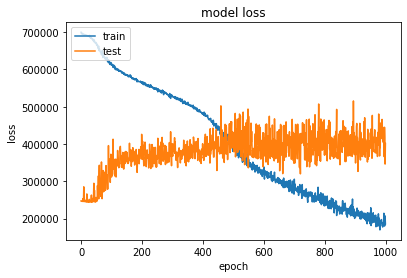

In [17]:
#from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
predictions = NN_model.predict(X_test)

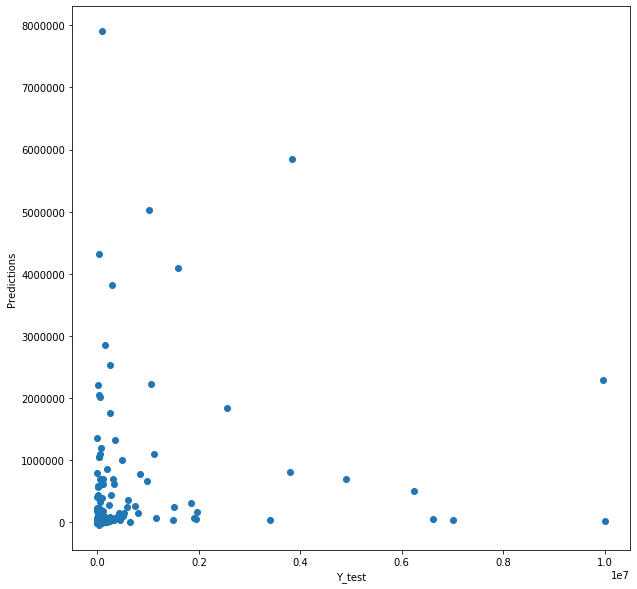

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.show()

#### Trying out Sequential Feature Selection

<Figure size 720x720 with 0 Axes>

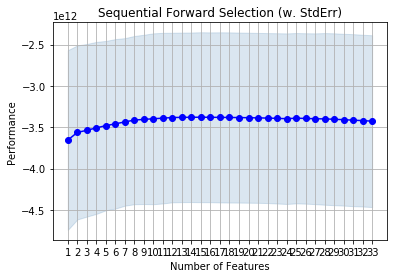

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=33, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)

plt.figure(figsize=(10,10))

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()